In [1]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
import decoupler

import os
import sys
import logging
import warnings
from deg import *

/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/scanpy/_utils/__init__.py:27: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/scanpy/__init__.py:36: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


In [2]:
adata_female_file = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/female_98_80.h5ad'
adata_male_file = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/male_98_85.h5ad'
#adata_with_features_file = 
adata_female = sc.read_h5ad(adata_female_file)
adata_male = sc.read_h5ad(adata_male_file)

In [3]:
# subset to skeletal muscle stem cells
adata_musc_f = adata_female[adata_female.obs['C_scANVI'] == 'Skeleton MuSc']
adata_musc_m = adata_male[adata_male.obs['C_scANVI'] == 'Skeleton MuSc']

## Geneset (atrophy/senescence) scores

In [ ]:
custom_atrophy_pathway = ["UBB","UBC","FBXO32","TRIM63","MDM2","FBXO30","CAMK2B","TIE1","PSMA1","PSMA2","PSMA3","PSMA4","PSMA5","PSMA6","PSMA7","PSMB1","PSMB2","PSMB3","PSMB4","FBXO21","FBXO31","NEDD4","UBE2B","UBE2G1","UBE2J1","CTSL","CTSV","BNIP3","DEPP1","GABARAPL1","MAP1LC3","RETREG1","SQSTM1","CAPN1","CAPN2","ATF4","FOXO1","FOXO3A","HDAC9","RUNX1","AMPD3","CHRNA1","CDKN1A"]
# Convert to mouse gene format
custom_atrophy_pathway_mouse = [gene.capitalize() for gene in custom_atrophy_pathway]
print(custom_atrophy_pathway_mouse)

['Ubb', 'Ubc', 'Fbxo32', 'Trim63', 'Mdm2', 'Fbxo30', 'Camk2b', 'Tie1', 'Psma1', 'Psma2', 'Psma3', 'Psma4', 'Psma5', 'Psma6', 'Psma7', 'Psmb1', 'Psmb2', 'Psmb3', 'Psmb4', 'Fbxo21', 'Fbxo31', 'Nedd4', 'Ube2b', 'Ube2g1', 'Ube2j1', 'Ctsl', 'Ctsv', 'Bnip3', 'Depp1', 'Gabarapl1', 'Map1lc3', 'Retreg1', 'Sqstm1', 'Capn1', 'Capn2', 'Atf4', 'Foxo1', 'Foxo3a', 'Hdac9', 'Runx1', 'Ampd3', 'Chrna1', 'Cdkn1a']


In [11]:
geneset_df = pd.DataFrame({'source': "Atrophy Pathway (PMID: 31325479)", 'target': custom_atrophy_pathway_mouse})
geneset_df

,source,target
0,Atrophy Pathway (PMID: 31325479),Ubb
1,Atrophy Pathway (PMID: 31325479),Ubc
2,Atrophy Pathway (PMID: 31325479),Fbxo32
3,Atrophy Pathway (PMID: 31325479),Trim63
4,Atrophy Pathway (PMID: 31325479),Mdm2
5,Atrophy Pathway (PMID: 31325479),Fbxo30
6,Atrophy Pathway (PMID: 31325479),Camk2b
7,Atrophy Pathway (PMID: 31325479),Tie1
8,Atrophy Pathway (PMID: 31325479),Psma1
9,Atrophy Pathway (PMID: 31325479),Psma2


In [12]:
%%time
decoupler.mt.aucell(
    adata_musc_f,
    geneset_df,
    verbose = True,
    raw=False,
)

2025-11-02 20:12:13 | [INFO] aucell - Running aucell
2025-11-02 20:12:13 | [INFO] Extracted omics mat with 362 rows (observations) and 1299 columns (features)
2025-11-02 20:12:13 | [WARNING] 1 features of mat are empty, they will be removed
2025-11-02 20:12:13 | [WARNING] weight not found in net.columns, adding it as:
net['weight'] = 1
2025-11-02 20:12:13 | [INFO] Network has 7 unique features and 1 unique sources
2025-11-02 20:12:13 | [INFO] aucell - calculating 1 AUCs for 1298 targets across 362 observations, categorizing features at rank=65


  0%|          | 0/362 [00:00<?, ?it/s]

2025-11-02 20:12:22 | [INFO] aucell - done


CPU times: user 8.1 s, sys: 1.89 s, total: 9.99 s
Wall time: 9.28 s


/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/decoupler/mt/_run.py:33: ImplicitModificationWarning: Setting element `.obsm['score_aucell']` of view, initializing view as actual.
  data.obsm[f'score_{name}'] = es


In [14]:
adata_musc_f

AnnData object with n_obs × n_vars = 362 × 1299
    obs: 'sample_id', 'cell_type', 'condition', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_mt_cb', 'log1p_total_counts_mt_cb', 'pct_counts_mt_cb', 'total_counts_ribo_cb', 'log1p_total_counts_ribo_cb', 'pct_counts_ribo_cb', 'total_counts_hb_cb', 'log1p_total_counts_hb_cb', 'pct_counts_hb_cb', 'n_genes', 'sex', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'hb', 'ribo', 'mt', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'cond

In [15]:
adata_musc_f.obs["Atrophy Pathway"] = adata_musc_f.obsm["score_aucell"]["Atrophy Pathway (PMID: 31325479)"]

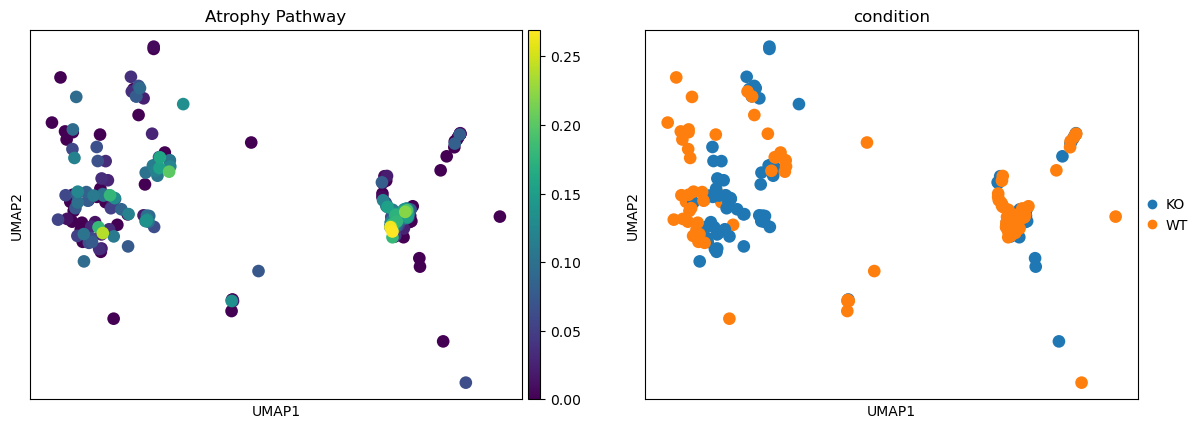

In [16]:
sc.pl.umap(adata_musc_f, color=["Atrophy Pathway", 'condition'])